## Data Glance and Cleaning

In [1]:
#import packages
import pandas as pd

In [2]:
#data exam
user_datasample = pd.read_csv('data_format1/user_log_format1.csv')
user_datasample.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [3]:
#find out the missing value in this file
user_datasample.isnull().sum()

user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

In [4]:
#get the mode brand id for all stores, fillin NA value in brain_id column
missing = user_datasample[user_datasample.brand_id.isnull()].index
seller = user_datasample.groupby(['seller_id']).apply(lambda x:x.brand_id.mode()[0]).reset_index()
get_brand = user_datasample.loc[missing]
get_brand = get_brand.merge(seller,how='left',on=['seller_id'])[0].astype('float32')
get_brand.index = missing
user_datasample.loc[missing,'brand_id'] = get_brand

In [5]:
#see whether null values are filled
user_datasample.isnull().sum()

user_id        0
item_id        0
cat_id         0
seller_id      0
brand_id       0
time_stamp     0
action_type    0
dtype: int64

In [6]:
#user info
user_info = pd.read_csv('data_format1/user_info_format1.csv')
user_info.head()

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [7]:
#user info
user_info.isnull().sum()

user_id         0
age_range    2217
gender       6436
dtype: int64

In [8]:
user_info.age_range.fillna(user_info.age_range.median(),inplace=True)
user_info.gender.fillna(2,inplace=True)
#user info NA value exam
user_info.isnull().sum()

user_id      0
age_range    0
gender       0
dtype: int64

## unique item/cat/store/brand count

In [9]:
# unique_item = user_datasample.groupby(['user_id'])['item_id'].unique()

In [10]:
type_list = ['item_id', 'cat_id','seller_id','brand_id','time_stamp']
unique_count_df = pd.DataFrame()
for i in type_list:
    unique_count = user_datasample.groupby(['user_id'])[i].nunique()
    unique_count_df = pd.concat([unique_count_df,unique_count], axis=1)
    

In [11]:
unique_count_df.head(20)

,item_id,cat_id,seller_id,brand_id,time_stamp
1,12,6,9,9,5
2,43,14,14,15,9
3,45,19,23,22,13
4,28,13,12,12,10
5,87,40,56,59,30
6,166,64,79,78,56
7,13,9,6,6,6
8,46,25,23,25,23
9,41,20,23,23,20
10,39,17,17,17,12


In [12]:
col_name_list = ['unique_item', 'unique_cat','unique_seller','unique_brand','unique_active_day']
unique_count_df.columns = col_name_list
unique_count_df.reset_index(inplace=True)

In [13]:
unique_count_df.head()

,index,unique_item,unique_cat,unique_seller,unique_brand,unique_active_day
0,1,12,6,9,9,5
1,2,43,14,14,15,9
2,3,45,19,23,22,13
3,4,28,13,12,12,10
4,5,87,40,56,59,30


## Level of activeness, count for the whole period & per month

In [14]:
import numpy as np
user_datasample['month'] = np.floor(user_datasample['time_stamp']/100).astype(int)
#user_datasample['month'] = np.floor(user_datasample['month']).astype(int)
user_datasample['day'] = user_datasample['time_stamp']%100
user_datasample.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,month,day
0,328862,323294,833,2882,2661.0,829,0,8,29
1,328862,844400,1271,2882,2661.0,829,0,8,29
2,328862,575153,1271,2882,2661.0,829,0,8,29
3,328862,996875,1271,2882,2661.0,829,0,8,29
4,328862,1086186,1271,1253,1049.0,829,0,8,29


In [15]:
#stat: for each user, in how many days he has action(all types)
time_diff = user_datasample[['user_id','month','day','action_type','time_stamp']]
time_diff_stat = pd.DataFrame(time_diff.groupby(['user_id','month','day'])['action_type'].count())
time_diff_stat.head()

action_type
user_id month day             
1       10    9              5
              11             4
              18             5
              21             2
        11    11            17

In [16]:
action_ct_by_day = time_diff.groupby(['user_id'])['time_stamp'].nunique()
action_ct_by_day = pd.DataFrame(action_ct_by_day).reset_index()
action_ct_by_day.head()

,user_id,time_stamp
0,1,5
1,2,9
2,3,13
3,4,10
4,5,30


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
action_ct_by_day['time_stamp'].describe()

count    424170.000000
mean         16.887491
std          14.155940
min           2.000000
25%           7.000000
50%          13.000000
75%          22.000000
max         181.000000
Name: time_stamp, dtype: float64

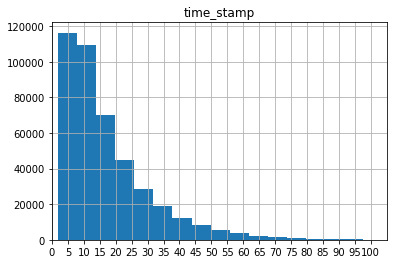

In [18]:
#draw the histogram
action_ct_by_day.hist(['time_stamp'], bins=30)
plt.xlim([0,105])
plt.xticks(range(0,105,5))
plt.show()

Fig.1 This is the histogram for user active day stat. We can see most users(75%) active day num is below 22 in the 6 month period.

In [19]:
time_diff.head()

,user_id,month,day,action_type,time_stamp
0,328862,8,29,0,829
1,328862,8,29,0,829
2,328862,8,29,0,829
3,328862,8,29,0,829
4,328862,8,29,0,829


In [20]:
action_ct_by_month = pd.DataFrame(time_diff.groupby(['user_id','month'])['day'].nunique()).reset_index()

In [21]:
action_ct_by_month.head()

,user_id,month,day
0,1,10,4
1,1,11,1
2,2,5,1
3,2,6,1
4,2,7,1


In [22]:
action_ct_by_month = pd.DataFrame(action_ct_by_month.groupby(['user_id'])['day'].mean().round(3)).reset_index()
action_ct_by_month.head()

,user_id,day
0,1,2.500
1,2,1.500
2,3,1.857
3,4,2.000
4,5,4.286


In [23]:
action_ct_by_month['day'].describe()

count    424170.000000
mean          3.102075
std           1.845011
min           1.000000
25%           1.857000
50%           2.600000
75%           3.800000
max          25.857000
Name: day, dtype: float64

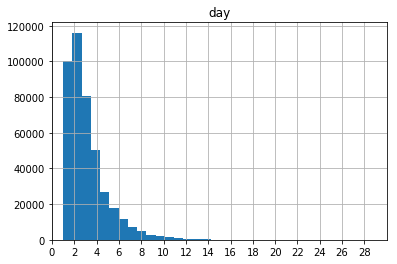

In [24]:
#draw the histogram
action_ct_by_month.hist(['day'], bins=30)
plt.xlim([0,30])
plt.xticks(range(0,30,2))
plt.show()

In [25]:
# concat and normalize with mean
action_count = pd.concat([action_ct_by_day, action_ct_by_month], axis=1)
action_count['day_norm'] = action_count['time_stamp'] / action_count['time_stamp'].mean()
action_count['month_avg_norm'] = action_count['day'] / action_count['day'].mean()
#action_count = action_count[['user_id', 'time_stamp', 'day', 'day_norm','month_avg_norm']]
action_count = action_count.rename(columns = {'time_stamp':'day_count', 'day':'month_count'})
action_count.head()

,user_id,day_count,user_id,month_count,day_norm,month_avg_norm
0,1,5,1,2.500,0.296077,0.805912
1,2,9,2,1.500,0.532939,0.483547
2,3,13,3,1.857,0.769801,0.598632
3,4,10,4,2.000,0.592154,0.644730
4,5,30,5,4.286,1.776463,1.381656


## Interval between actions: Min, Max, Mean

In [27]:
time_diff_try = time_diff
#time_diff_try.sort(['user_id', 'month', 'day'], inplace = True)

In [28]:
time_diff_try.head()

,user_id,month,day,action_type,time_stamp
0,328862,8,29,0,829
1,328862,8,29,0,829
2,328862,8,29,0,829
3,328862,8,29,0,829
4,328862,8,29,0,829
